### Aufgabe 1: Grundlegende API-Abfrage und Extrahieren von Daten

1. Frage: Was ist eine API, und wie wird sie verwendet, um Daten aus einer externen Quelle abzurufen?

2. Aufgabe: Verwenden Sie die CoinGecko-API, um den aktuellen Preis von Bitcoin in USD abzurufen und das Ergebnis in der Konsole auszugeben.

In [9]:
# Importieren der CoinGeckoAPI-Bibliothek, um mit der CoinGecko-API zu interagieren
from pycoingecko import CoinGeckoAPI

# Erstellen einer Instanz der CoinGeckoAPI-Klasse, um API-Anfragen zu senden
cg = CoinGeckoAPI()

# Abrufen des aktuellen Preises für Bitcoin in der Zielwährung USD
# Die Methode `get_price` akzeptiert verschiedene Parameter:
# - `ids='bitcoin'`: Definiert die Kryptowährung, für die der Preis abgefragt wird (hier "bitcoin").
# - `vs_currencies='usd'`: Gibt an, dass der Preis in USD (US-Dollar) abgerufen werden soll.
data = cg.get_price(ids='bitcoin', vs_currencies='usd')

# Ausgabe des abgerufenen Preises in der Konsole
# Hier wird aus dem `data`-Dictionary der Preis von Bitcoin in USD extrahiert.
# `data['bitcoin']['usd']` greift auf den Wert für den Bitcoin-Preis in USD zu.
print("Aktueller Preis von Bitcoin in USD:", data['bitcoin']['usd'])



Aktueller Preis von Bitcoin in USD: 79648


### Aufgabe 2: Abfrage mehrerer Kryptowährungen und Konvertierung in ein DataFrame

1. Frage: Wie können mehrere Kryptowährungen gleichzeitig abgefragt werden, und wie lassen sich die Ergebnisse in ein DataFrame konvertieren?

2. Aufgabe: Verwenden Sie die CoinGecko-API, um die aktuellen Preise der Kryptowährungen Bitcoin, Ethereum und Dogecoin in USD abzurufen. Speichern Sie die Ergebnisse in einem Pandas-DataFrame und zeigen Sie diesen an.

In [2]:
import pandas as pd

# Abrufen der Preise mehrerer Kryptowährungen in USD
data = cg.get_price(ids=['bitcoin', 'ethereum', 'dogecoin'], vs_currencies='usd')

# Umwandeln in ein DataFrame
df = pd.DataFrame(data).T
df.columns = ['Price (USD)']
print(df)


           Price (USD)
bitcoin   79632.000000
dogecoin      0.245275
ethereum   3198.940000


### Aufgabe 3: Zusätzliche Parameter und Berechnung der Preisänderung

1. Frage: Wie können Sie optionale Parameter in einer API-Abfrage hinzufügen und damit zusätzliche Daten erhalten?

2. Aufgabe: Rufen Sie den aktuellen Preis sowie die Marktkapitalisierung und die 24-Stunden-Preisänderung für Bitcoin, Ethereum und Dogecoin ab. Speichern Sie die Ergebnisse in einem DataFrame und zeigen Sie die 24-Stunden-Preisänderung an.

In [8]:
# Abrufen von Preis, Marktkapitalisierung und 24-Stunden-Preisänderung für die Kryptowährungen Bitcoin, Ethereum und Dogecoin
data = cg.get_price(
    ids=['bitcoin', 'ethereum', 'dogecoin'],   # IDs der Kryptowährungen, die abgefragt werden sollen
    vs_currencies='usd',                       # Zielwährung für die Umrechnung (hier USD)
    include_market_cap='true',                 # Marktkapitalisierung der Kryptowährungen einschließen
    include_24hr_change='true'                 # 24-Stunden-Preisänderung einschließen
)

# Umwandeln des abgerufenen Dictionary in ein Pandas DataFrame für einfachere Datenverarbeitung
df = pd.DataFrame(data).T                # Transponieren (T) des DataFrames, um die Kryptowährungen als Zeilen anzuzeigen
df.columns = ['Price (USD)', 'Market Cap (USD)', '24h Change (%)']  # Umbenennen der Spalten zur besseren Verständlichkeit

# Ausgabe der 24-Stunden-Preisänderung für jede Kryptowährung
print("24-Stunden-Preisänderung:")
print(df[['24h Change (%)']])            # Ausgabe der Spalte mit der 24-Stunden-Preisänderung

24-Stunden-Preisänderung:
          24h Change (%)
bitcoin         4.601668
dogecoin       19.926379
ethereum        5.467233


### Aufgabe 4: Datenbereinigung und Formatierung

1. Frage: Wie konvertiert man Daten aus einem Dictionary in ein DataFrame und bereitet sie für die Visualisierung vor?

2. Aufgabe: Rufen Sie die Preise der Kryptowährungen Bitcoin, Ethereum und Dogecoin in USD ab und erstellen Sie ein DataFrame. Runden Sie die Preise auf zwei Dezimalstellen und sortieren Sie das DataFrame nach den Preisen in absteigender Reihenfolge.

In [4]:
# Abrufen der Daten
data = cg.get_price(ids=['bitcoin', 'ethereum', 'dogecoin'], vs_currencies='usd')

# Umwandeln in DataFrame und Runden der Werte auf zwei Dezimalstellen
df = pd.DataFrame(data).T
df.columns = ['Price (USD)']
df['Price (USD)'] = df['Price (USD)'].round(2)

# Sortieren nach Preis in absteigender Reihenfolge
df = df.sort_values(by='Price (USD)', ascending=False)
print(df)


          Price (USD)
bitcoin      79632.00
ethereum      3198.94
dogecoin         0.25


### Aufgabe 5: Visualisierung von Kryptowährungspreisen

1. Frage: Wie lassen sich Kryptowährungspreise in einem Balkendiagramm visualisieren?

2. Aufgabe: Erstellen Sie ein Balkendiagramm, das die aktuellen Preise von Bitcoin, Ethereum und Dogecoin in USD anzeigt. Beschriften Sie die Achsen und geben Sie den Preis oberhalb jedes Balkens an.

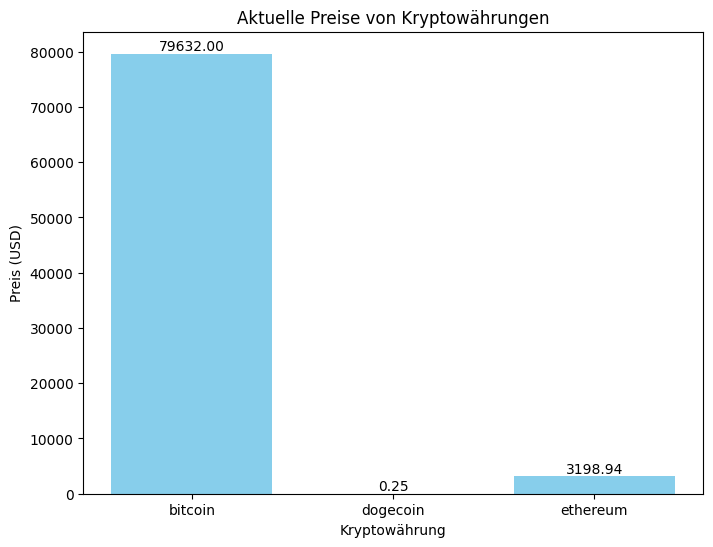

In [5]:
import matplotlib.pyplot as plt

# Daten abrufen und in DataFrame umwandeln
data = cg.get_price(ids=['bitcoin', 'ethereum', 'dogecoin'], vs_currencies='usd')
df = pd.DataFrame(data).T
df.columns = ['Price (USD)']

# Balkendiagramm erstellen
plt.figure(figsize=(8, 6))
bars = plt.bar(df.index, df['Price (USD)'], color='skyblue')
plt.xlabel('Kryptowährung')
plt.ylabel('Preis (USD)')
plt.title('Aktuelle Preise von Kryptowährungen')

# Preise oberhalb der Balken anzeigen
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()


### Aufgabe 6: Zeitreihe und Preisentwicklung

1. Frage: Wie können historische Daten von CoinGecko abgerufen und als Zeitreihe visualisiert werden?

2. Aufgabe: Rufen Sie die historischen Preise von Bitcoin in den letzten 7 Tagen ab und erstellen Sie ein Liniendiagramm, das die Preisentwicklung darstellt.

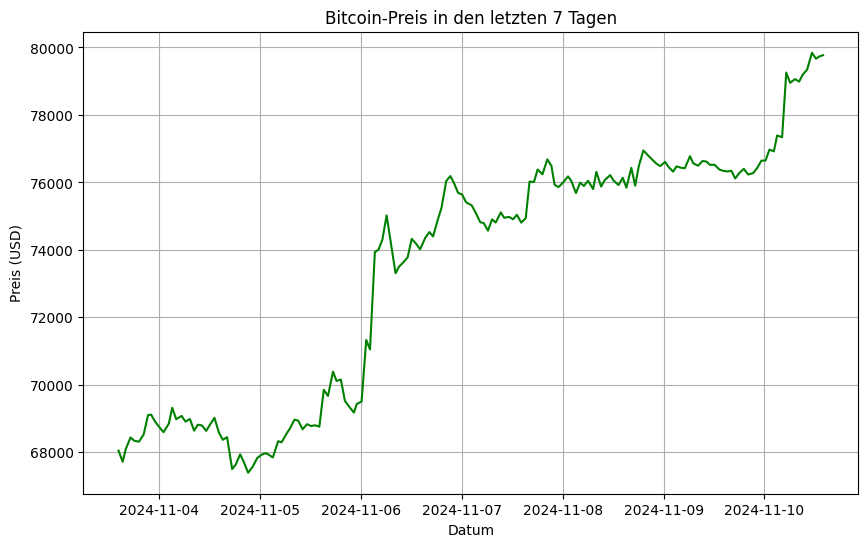

In [6]:
# Abrufen der historischen Preise für Bitcoin (letzte 7 Tage)
historical_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=7)

# Umwandeln in DataFrame und formatieren
prices = pd.DataFrame(historical_data['prices'], columns=['Timestamp', 'Price (USD)'])
prices['Timestamp'] = pd.to_datetime(prices['Timestamp'], unit='ms')

# Liniendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.plot(prices['Timestamp'], prices['Price (USD)'], color='green')
plt.xlabel('Datum')
plt.ylabel('Preis (USD)')
plt.title('Bitcoin-Preis in den letzten 7 Tagen')
plt.grid(True)
plt.show()


### Aufgabe 7: Abfrage und Umwandlung komplexer API-Strukturen in DataFrames

1. Frage: APIs liefern oft verschachtelte Datenstrukturen. Wie können Sie solche Strukturen analysieren und in ein DataFrame umwandeln?

2. Aufgabe: Verwenden Sie die CoinGecko-API, um die Marktdaten für Bitcoin, Ethereum und Dogecoin (Preis, Marktkapitalisierung, 24-Stunden-Preisänderung) abzurufen und in ein DataFrame zu speichern. Bereinigen Sie die Daten und geben Sie das Ergebnis aus.

In [ ]:
# Abrufen der Daten mit mehreren Feldern
data = cg.get_price(
    ids=['bitcoin', 'ethereum', 'dogecoin'],
    vs_currencies='usd',
    include_market_cap='true',
    include_24hr_change='true'
)

# Umwandeln in DataFrame
df = pd.DataFrame(data).T
df.columns = ['Price (USD)', 'Market Cap (USD)', '24h Change (%)']

# Bereinigen der Daten (z.B. auf zwei Dezimalstellen runden)
df['Price (USD)'] = df['Price (USD)'].round(2)
# .apply(lambda x: f'{x:,.0f}') formatiert die Zahlen als Strings mit Tausendertrennzeichen (Komma), ohne Dezimalstellen (0f steht für null Dezimalstellen)
df['Market Cap (USD)'] = df['Market Cap (USD)'].apply(lambda x: f'{x:,.0f}')
# prozentuale Preisänderung der letzten 24 Stunden (24h Change (%)) wird auf zwei Dezimalstellen gerundet
df['24h Change (%)'] = df['24h Change (%)'].round(2)

print(df)

          Price (USD)   Market Cap (USD)  24h Change (%)
bitcoin      79631.00  1,575,877,176,292            4.31
dogecoin         0.25     36,061,945,916           19.42
ethereum      3198.81    385,341,092,695            5.20


THE END